In [1]:
import numpy
import pickle
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, Conv2D, Dropout, Activation, Flatten, Reshape, Concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers import MaxPooling2D
from keras.models import Model

Using TensorFlow backend.


In [2]:
X_t = []
y = []
for i in range(8):
    X_t.extend(pickle.load(open('C:/Users/wangzixi/Desktop/学习/斗地主/data/stage1/x_%d.pkl'%i,'rb')))
    y.extend(pickle.load(open('C:/Users/wangzixi/Desktop/学习/斗地主/data/stage1/y_%d.pkl'%i,'rb')))

In [5]:
inp = Input((5,15))
x = Reshape((5,15,1))(inp)
x = BatchNormalization()(x)
x = Conv2D(filters=128, kernel_size=(5,3),activation='relu')(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(64,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1,activation='sigmoid')(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='mean_squared_error', optimizer='nadam', metrics=['mae'])

In [6]:
model.fit(X_t, y, batch_size=1024, epochs=100, validation_split=0.1) # validation_split=0.1)

Train on 210051 samples, validate on 23339 samples
Epoch 1/100
210051/210051 [==============================] - 25s 118us/step - loss: 0.0224 - mean_absolute_error: 0.1099 - val_loss: 0.0166 - val_mean_absolute_error: 0.0916
Epoch 2/100
210051/210051 [==============================] - 22s 103us/step - loss: 0.0110 - mean_absolute_error: 0.0755 - val_loss: 0.0106 - val_mean_absolute_error: 0.0752
Epoch 3/100
210051/210051 [==============================] - 22s 103us/step - loss: 0.0086 - mean_absolute_error: 0.0665 - val_loss: 0.0092 - val_mean_absolute_error: 0.0663
Epoch 4/100
210051/210051 [==============================] - 22s 103us/step - loss: 0.0076 - mean_absolute_error: 0.0619 - val_loss: 0.0074 - val_mean_absolute_error: 0.0605
Epoch 5/100
210051/210051 [==============================] - 22s 104us/step - loss: 0.0069 - mean_absolute_error: 0.0589 - val_loss: 0.0078 - val_mean_absolute_error: 0.0603
Epoch 6/100
210051/210051 [==============================] - 22s 107us/step - l

210051/210051 [==============================] - 25s 118us/step - loss: 0.0037 - mean_absolute_error: 0.0435 - val_loss: 0.0049 - val_mean_absolute_error: 0.0499
Epoch 48/100
210051/210051 [==============================] - 28s 131us/step - loss: 0.0038 - mean_absolute_error: 0.0437 - val_loss: 0.0047 - val_mean_absolute_error: 0.0493
Epoch 49/100
210051/210051 [==============================] - 28s 131us/step - loss: 0.0037 - mean_absolute_error: 0.0434 - val_loss: 0.0061 - val_mean_absolute_error: 0.0556
Epoch 50/100
210051/210051 [==============================] - 25s 120us/step - loss: 0.0037 - mean_absolute_error: 0.0436 - val_loss: 0.0045 - val_mean_absolute_error: 0.0476
Epoch 51/100
210051/210051 [==============================] - 23s 112us/step - loss: 0.0037 - mean_absolute_error: 0.0431 - val_loss: 0.0045 - val_mean_absolute_error: 0.0481
Epoch 52/100
210051/210051 [==============================] - 24s 113us/step - loss: 0.0037 - mean_absolute_error: 0.0433 - val_loss: 0.00

Epoch 94/100
210051/210051 [==============================] - 23s 108us/step - loss: 0.0034 - mean_absolute_error: 0.0418 - val_loss: 0.0047 - val_mean_absolute_error: 0.0490
Epoch 95/100
210051/210051 [==============================] - 24s 112us/step - loss: 0.0034 - mean_absolute_error: 0.0418 - val_loss: 0.0046 - val_mean_absolute_error: 0.0484
Epoch 96/100
210051/210051 [==============================] - 23s 109us/step - loss: 0.0034 - mean_absolute_error: 0.0417 - val_loss: 0.0044 - val_mean_absolute_error: 0.0471
Epoch 97/100
210051/210051 [==============================] - 24s 116us/step - loss: 0.0034 - mean_absolute_error: 0.0416 - val_loss: 0.0044 - val_mean_absolute_error: 0.0476
Epoch 98/100
210051/210051 [==============================] - 24s 114us/step - loss: 0.0034 - mean_absolute_error: 0.0418 - val_loss: 0.0044 - val_mean_absolute_error: 0.0482
Epoch 99/100
210051/210051 [==============================] - 24s 112us/step - loss: 0.0034 - mean_absolute_error: 0.0417 - v

In [ ]:
pickle.dump(X_t,open('C:/Users/wangzixi/Desktop/学习/斗地主/data/stage1/x_all_py2.pkl','wb'))
pickle.dump(y,open('C:/Users/wangzixi/Desktop/学习/斗地主/data/stage1/y_all.pkl','wb'))

In [51]:
model.save('C:/Users/wangzixi/Desktop/doudizhu_model/value.h5')

In [11]:
y_pred = model.predict(X_t)

In [14]:
from matplotlib import pyplot

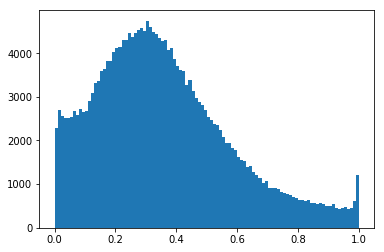

In [17]:
pyplot.hist(y_pred,bins=100)
pyplot.show()

In [140]:
i = 33

In [141]:
X_t[i]

[array([ 1.,  0.,  1.,  2.,  1.,  1.,  0.,  2.,  1.,  2.,  0.,  0.,  0.,
         0.,  0.]),
 array([ 2.,  1.,  2.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]),
 array([ 0.,  2.,  0.,  1.,  0.,  1.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.]),
 array([ 1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  4.,  4.,  4.,
         1.,  1.]),
 array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.])]

In [142]:
y_pred[i]

array([ 0.50706708], dtype=float32)

In [143]:
y[i]

0.5452

In [146]:
y_pred = model.predict(X_t,verbose = 1)

In [148]:
y_pred

array([ 0.50706708], dtype=float32)